# Beginning of Project for Predicting Glass types

We will be looking at the glass dataset from the UCI Machine learning repository.The goal of this Project is to build a model that successfully predicts the type of glass based on the evidence of it remaining at the scene. https://archive.ics.uci.edu/ml/datasets/glass+identification

The Attributes are as follows:

Id number: 1 to 214
RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute) -- 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 3 vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 6 tableware -- 7 headlamps
Goal: To build a model that accurately classifies types of glass characteristics into the type of glass they came from.

# # Importing the necessary libraries and setting up the directory.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os
path = "C:/Users/Faraz/Downloads/PythonProjects"
os.chdir(path)
os.getcwd()


'C:\\Users\\Faraz\\Downloads\\PythonProjects'

# # Importing the Data

In [3]:
glassdata = pd.read_csv("glass.csv")
glassdata.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# # Initial Exploration

In [4]:
print(glassdata.isnull().sum())  # Confirming that there are no missing values


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [5]:
glassdata.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
glassdata.shape


(214, 10)

In [7]:
glassdata.dtypes


RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# # Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9C3004C18>,
      dtype=object)

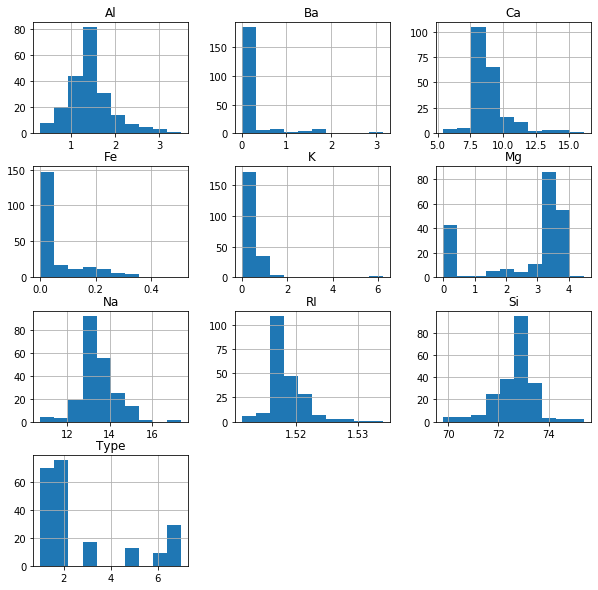

In [8]:
glassdata.hist(figsize= (10,10))  # Understanding where most of the values line up 


Looking at the histograms, we clearly see none of these exhibit a standard normal distribution. K and Ba are the elements that are the most off.

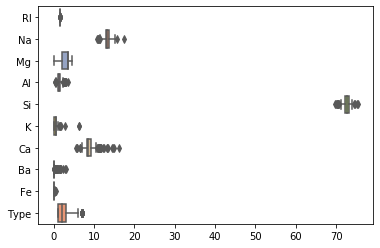

In [9]:
boxplot = sns.boxplot(data=glassdata, orient="h", palette="Set2")


It seems most of the values for the materials are consistent, however NA(Sodium has a lot of outliers). Silicon is also very much high in terms of amount but also straying away from the rest of the materials and values. Sodium might be a high amount in Glass?

In [10]:
corr = glassdata.corr()
corr


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


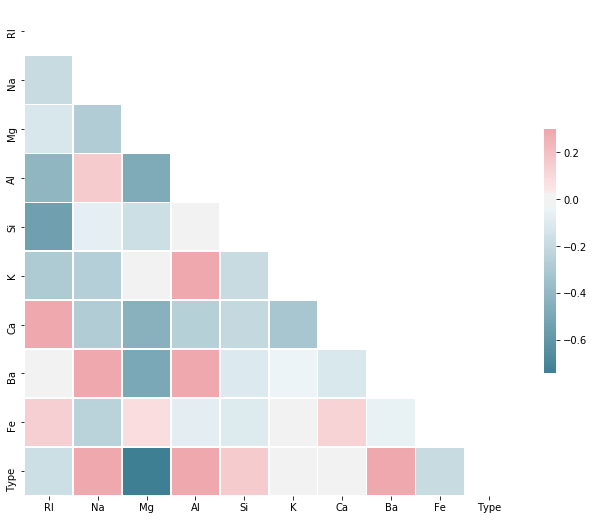

In [11]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Looking at the correlation we see that the elements that are the most correlated with the type of the glass are from lowest to highest, Na(Positive), Al(Positive), and Mg(Negative) These 3 all also had data points with a right skew in the histogram. Something else to note Ca has a high correlation with the reserved index.

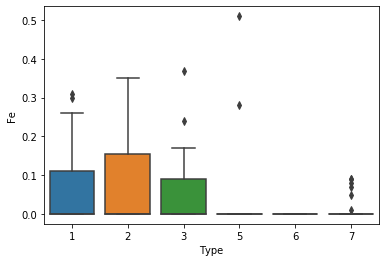

In [12]:
sns.boxplot('Type', 'Fe', data=glassdata)
# Iron mainly present in types 1-3 and outliers in type 7


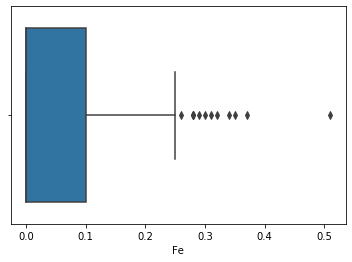

In [13]:
import seaborn as sns
sns.boxplot(x=glassdata['Fe'])


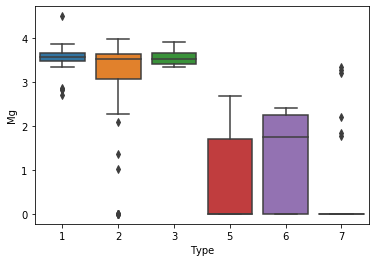

In [14]:
sns.boxplot('Type', 'Mg', data=glassdata)  # Outliers in glass type 2 and 7


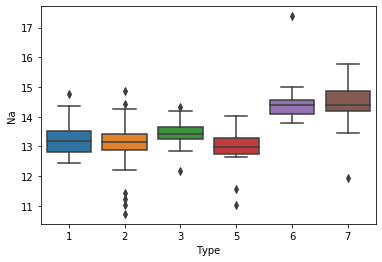

In [15]:
sns.boxplot('Type', 'Na', data=glassdata)  # Main outliers are present in glass type 2


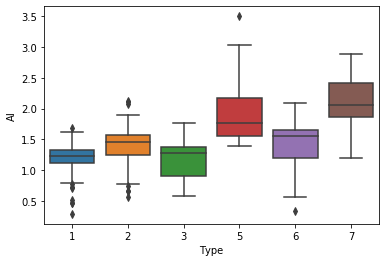

In [16]:
sns.boxplot('Type', 'Al', data=glassdata)  # Outliers present in types 1 and 2


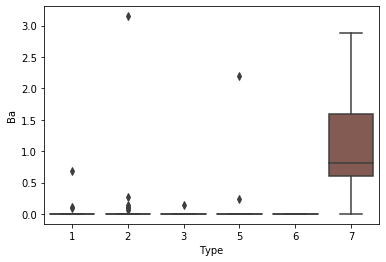

In [17]:
sns.boxplot('Type', 'Ba', data=glassdata)  # Very few outliers but it seems Barium only exists in glass type 7


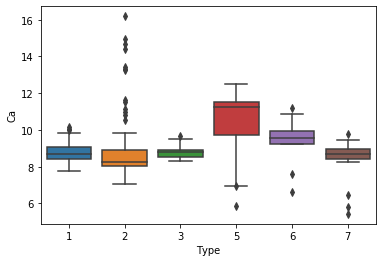

In [18]:
sns.boxplot('Type', 'Ca', data=glassdata)  # Outliers present for glass types 2 and 7


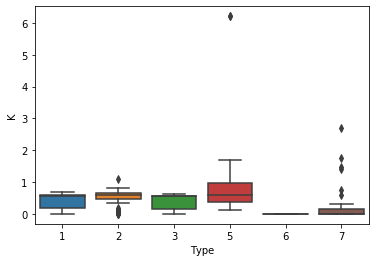

In [19]:
sns.boxplot('Type', 'K', data=glassdata)  # Outliers mainly present for glass type 7


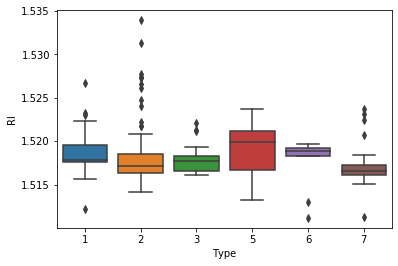

In [20]:
sns.boxplot('Type', 'RI', data=glassdata)  # Outliers present when predicting glass types 1,2,3, and 7


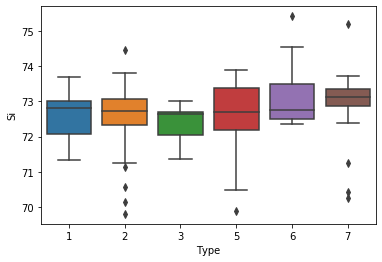

In [21]:
sns.boxplot('Type', 'Si', data=glassdata)  # Outliers present when predicting glass types 2 and 7


Given that type 2 had the highest number of outliers, it is not surprising because type 2 was also where most of the observations came from. Because of this, the next goal is to remove the outliers we have observed. As it stands removing outliers for Na and Al.

[]

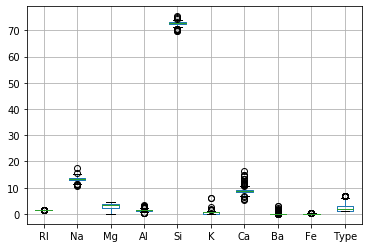

In [22]:
glassdata.boxplot(return_type='dict')
plt.plot()


# # Model Selection (Random Forest)

In [23]:
glassdata.target = glassdata['Type']


C:\Users\faraz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [24]:
from sklearn.model_selection import train_test_split  # Importing library for split
xTrain, xTest, yTrain, yTest = train_test_split(glassdata.drop(['Type'], axis=1), 
glassdata.target, random_state=0, test_size=0.25)


In [25]:
from sklearn.ensemble import RandomForestClassifier
# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)
# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xTrain, yTrain)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
y_pred = clf.predict(xTest)


In [27]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yTest, y_pred))


Accuracy: 0.7222222222222222


In [28]:
feature_importances = pd.DataFrame(clf.feature_importances_, 
                    index = xTrain.columns,
                    columns=['importance']).sort_values('importance',ascending=False)


In [29]:
feature_importances


,importance
Al,0.185494
Mg,0.159679
RI,0.135523
Ca,0.131714
K,0.099004
Na,0.097959
Ba,0.091931
Si,0.078350
Fe,0.020347


Looking at feature importance, we see that Aluminum is the highest and contributes the most to the Random Forest Model, next being Magnesium. This makes sense as these were 2 of the 3 highly correlated values when looking at type that we observed earlier. NA which was the third is 5th on this list meaning it does not contribute as much to the random forest model as we thought. We do know that there is a healthy sense of bias in using feature importance, it might be that Al had the most number of complete observations?

This also hints that removing outliers especially from Al and Na should contribute to a positive effect on the model.

# # Tuning the Model

###  Outlier Removal

In [30]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(glassdata))
print(z)


[[0.87286765 0.28495326 1.25463857 ... 0.35287683 0.5864509  0.84827468]
 [0.24933347 0.59181718 0.63616803 ... 0.35287683 0.5864509  0.84827468]
 [0.72131806 0.14993314 0.60142249 ... 0.35287683 0.5864509  0.84827468]
 ...
 [0.75404635 1.16872135 1.86551055 ... 2.95320036 0.5864509  2.01047778]
 [0.61239854 1.19327046 1.86551055 ... 2.81208731 0.5864509  2.01047778]
 [0.41436305 1.00915211 1.86551055 ... 3.01367739 0.5864509  2.01047778]]


In [31]:
threshold = 3
print(np.where(z > 3))


(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [32]:
glassdatanoout = glassdata[(z < 3).all(axis=1)]


In [33]:
glassdatanoout.shape


(194, 10)

In [34]:
glassdata.shape


(214, 10)

In [35]:
glassdatanoout.target = glassdatanoout['Type'] 


C:\Users\faraz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


## Re-Training after Ouliers have been removed


In [36]:
from sklearn.model_selection import train_test_split  # Importing library for split
xTrainnoout, xTestnoout, yTrainnoout, yTestnoout = train_test_split(glassdatanoout.drop(['Type'], axis=1), 
glassdatanoout.target, random_state=0, test_size=0.25)


In [37]:
clf.fit(xTrainnoout,yTrainnoout)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
y_prednoout = clf.predict(xTestnoout)


In [39]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(yTestnoout, y_prednoout))


Accuracy: 0.8367346938775511


In [40]:
clf.fit(xTrainnoout,yTrainnoout).score(xTrainnoout, yTrainnoout)


1.0

In [41]:
# Getting the importance of features when factoring them into the model
feature_importances = pd.DataFrame(clf.feature_importances_,
                            index = xTrainnoout.columns,
                            columns=['importance']).sort_values('importance', ascending=False)


In [42]:
feature_importances


,importance
Al,0.172167
Ca,0.163366
RI,0.138730
Mg,0.137702
K,0.106580
Ba,0.084438
Si,0.081575
Na,0.077512
Fe,0.037928


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, y_pred)
print(confusion_matrix)


[[12  2  0  0  0  0]
 [ 7 15  1  0  0  1]
 [ 2  2  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]


Next we will use Grid Search CV to sample from the best values provided by the random forest process. This will help to see if we can improve the accuracy further.

## Hyper Parameter Tuning with Grid Search CV

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [45]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}


In [52]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=Warning)

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
CV_rfc.fit(xTrainnoout, yTrainnoout)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [53]:
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [54]:
rfc1 = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=200, max_depth=8, criterion='gini')


In [56]:
rfc1.fit(xTrainnoout, yTrainnoout)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [57]:
pred = rfc1.predict(xTestnoout)
print("Accuracy for Random Forest on CV data: ", metrics.accuracy_score(yTestnoout, pred))


Accuracy for Random Forest on CV data:  0.8367346938775511


In [58]:
rfc1.fit(xTrainnoout, yTrainnoout).score(xTrainnoout, yTrainnoout)


0.9862068965517241

The GridSearch CV has increased the Random Forest by 2% thus improving the accuracy of the prediction. It does this by finding the best number of forests (number of trees) and splits the data across it to achieve a prediction. I can't achieve above this accuracy, as I lead into overfitting. This will be the final model.